# TITANIC CLASSIFICATION

## BHARAT INTERN [TASK 2]:

#### Importing necessary libraries

In [137]:
import numpy as np     #Import Numpy library for numerical computations
import pandas as pd    #Import Pandas library for data manipulation and analysis  
import seaborn as sns  #Import Seaborn library for statiscal data visualization
import matplotlib.pyplot as plt                       #Import Matplotlib library for data visualization
from sklearn.model_selection import train_test_split  #Import train_test_split function for splittng data
from sklearn.metrics import confusion_matrix          #Import confusion_matrix function for detailed classification metrics
from sklearn.metrics import classification_report     #Import classification_report function for detailed clssification metrics
from sklearn.linear_model import LogisticRegressio    #Import LogisticRegression class from logistic regression

In [138]:
df=pd.read_csv("Titanic-Dataset.csv")

#### Understanding the data

In [139]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
#shape and size of data present
df.shape

(891, 12)

In [141]:
#features of data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [142]:
#Statiscal summmary of data
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Checking missing values

In [143]:
missing_values=df.isnull().sum()
missing_values.sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

#### Visualizing the data

In [144]:
def count_plot(feature) :   
#the count_plot frunction creates a barplot showing countsof unique values of categorical variable
    sns.countplot(x=feature ,data= df)
    plt.show()

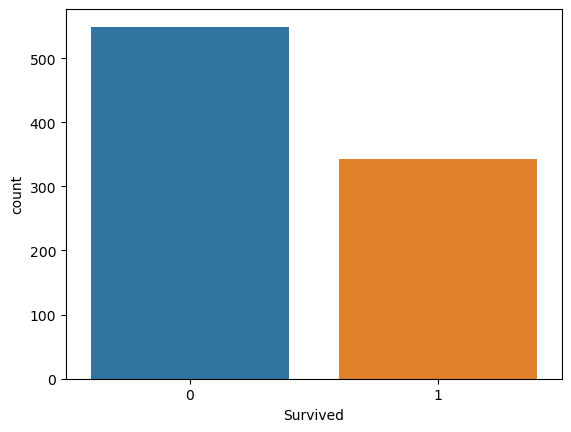

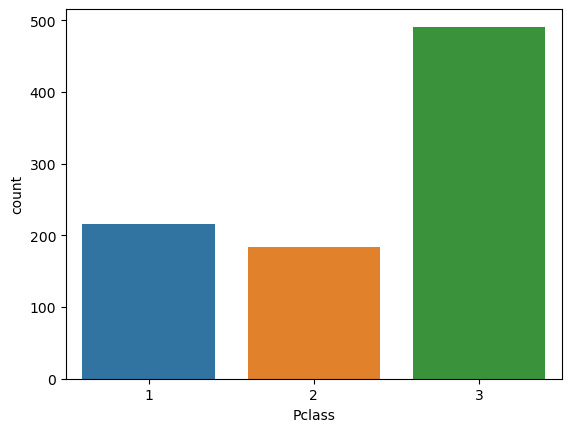

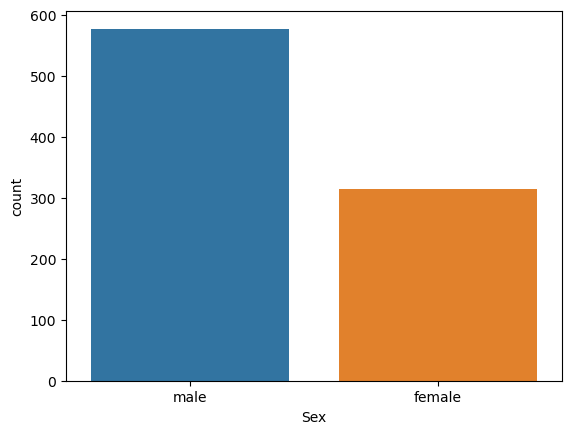

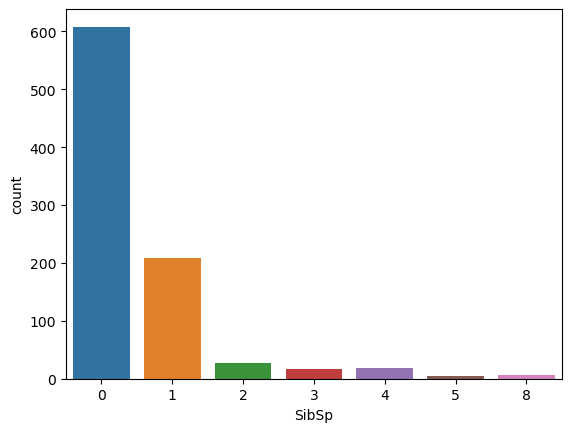

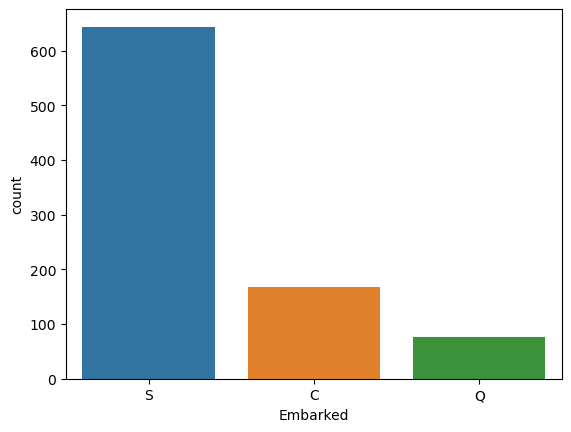

In [145]:
# columns to be visualized
columns=['Survived','Pclass','Sex','SibSp','Embarked']
for i in columns:
    count_plot(i)

#### Data preprocessing

In [146]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
df.drop(['PassengerId','Name','Cabin','Ticket',],axis=1,inplace=True)

In [148]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [149]:
#filling missing values
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [150]:
#Creating dummy variables for the 'Sex'column using get_dummies()function to transform categorical variables into numerical representations
sex=pd.get_dummies(df['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [151]:
#Creating dummy variable for the 'Embarked' column
embark=pd.get_dummies(df['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [152]:
#Creating  dummmy variables for the 'Pclass' column
pclass=pd.get_dummies(df['Pclass'],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [153]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [154]:
df.drop(["Sex","Embarked","Pclass"], axis=1 , inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [155]:
#Concatenating the oringinal df with the dummmy variables
df=pd.concat([df,sex,embark,pclass],axis=1)
#Converting the features to string datatype
df.columns=df.columns.astype(str)
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


#### Training the model

In [156]:
#Creatingg the feature variable X by dropping the 'Survived' column from df
X=df.drop(['Survived'],axis=1)

#Creating target variable y by assigning the 'Survived 'column
y=df['Survived']

In [157]:
X_train,X_test,y_train,y_test = train_test_split( X , y ,test_size=0.3,random_state = 42)

In [158]:
#Creating and trainingthe logistic regression model
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

##### Testing accuracy of logistic regression on training data


In [159]:
model.score(X_train,y_train)

0.812199036918138

##### Testing accuracy of logistic regression on test data

In [160]:
model.score(X_test,y_test)

0.8059701492537313

In [161]:
#Using the model to predict the labels
y_predicted=model.predict(X_test)

# Evaluate the performance of a model by calculating the confusion matrix
confusion_matrix(y_test, y_predicted)

array([[137,  20],
       [ 32,  79]], dtype=int64)

###### Classification Report

In [164]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.80      0.71      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

